In [1]:
from matplotlib import pyplot as plt
import numpy as np

def cosinus_signal_func(freq=None, T=None, init_phase=0):
    if freq:
        w = 2 * np.pi * freq
    elif T:
        w = 2 * np.pi / T
    else:
        return None
    cos_func = lambda t: np.cos(t * w + init_phase)

    return cos_func


def calc_signal(s_func, t_start=0, t_end=None, t_step=None):
    if t_end is None:
        t_end = 2
    if t_step is None:
        t_step = 0.01

    time_series = np.arange(t_start, t_end, t_step)
    signal_vals = np.array([s_func(t) for t in time_series])

    return signal_vals, time_series

In [2]:
cos_50hz_f  = cosinus_signal_func(freq= 50)
cos_150hz_f = cosinus_signal_func(freq= 150)
cos_450hz_f = cosinus_signal_func(freq=450)
cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.1, t_step=0.0001)
cos_150hz_signal, t_series_150hz = calc_signal(cos_150hz_f, t_end=0.1, t_step=0.0001)
cos_450hz_signal, t_series_450hz = calc_signal(cos_450hz_f,t_end=0.1,t_step=0.0001)
cos_signal = cos_50hz_signal + cos_150hz_signal + cos_450hz_signal
spectrum_cos_signal = np.fft.fft(cos_signal)
xfs = np.linspace(0, 10000, t_series_150hz.shape[0])

E:\PycharmProjects\digital_signals\venv\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


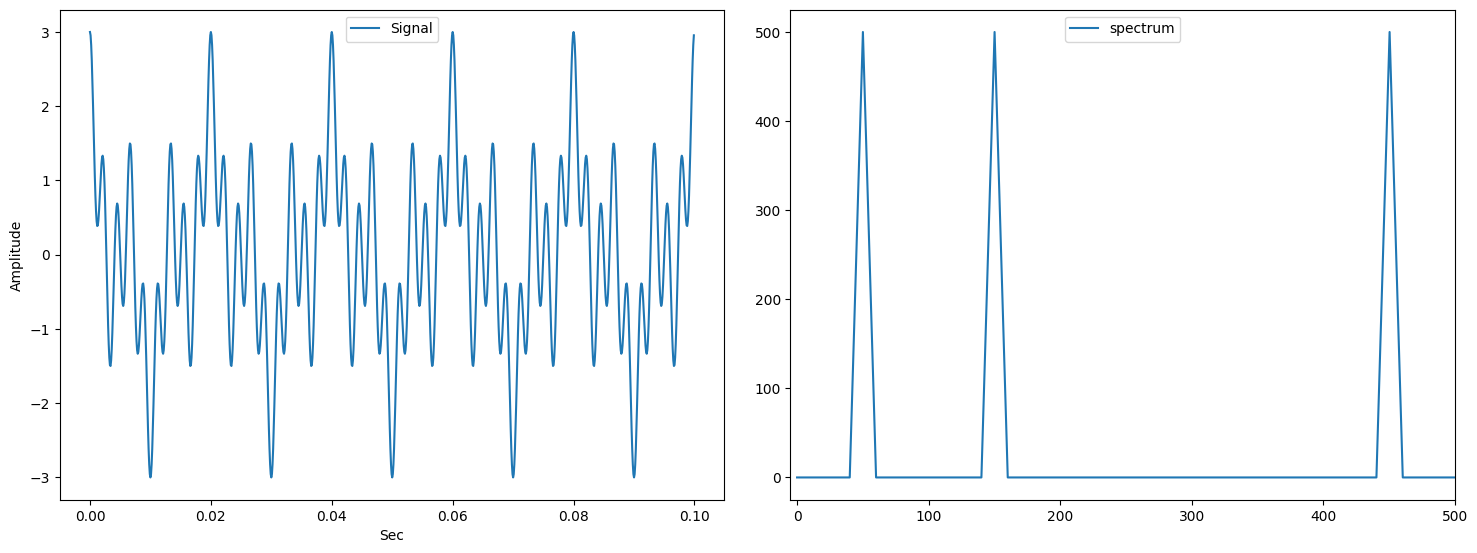

In [3]:
fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_450hz, cos_signal, label="Signal")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")

plt.subplot(222)
plt.plot(xfs, spectrum_cos_signal, label="spectrum")
plt.xlim([-5,500])
plt.legend()

plt.show()

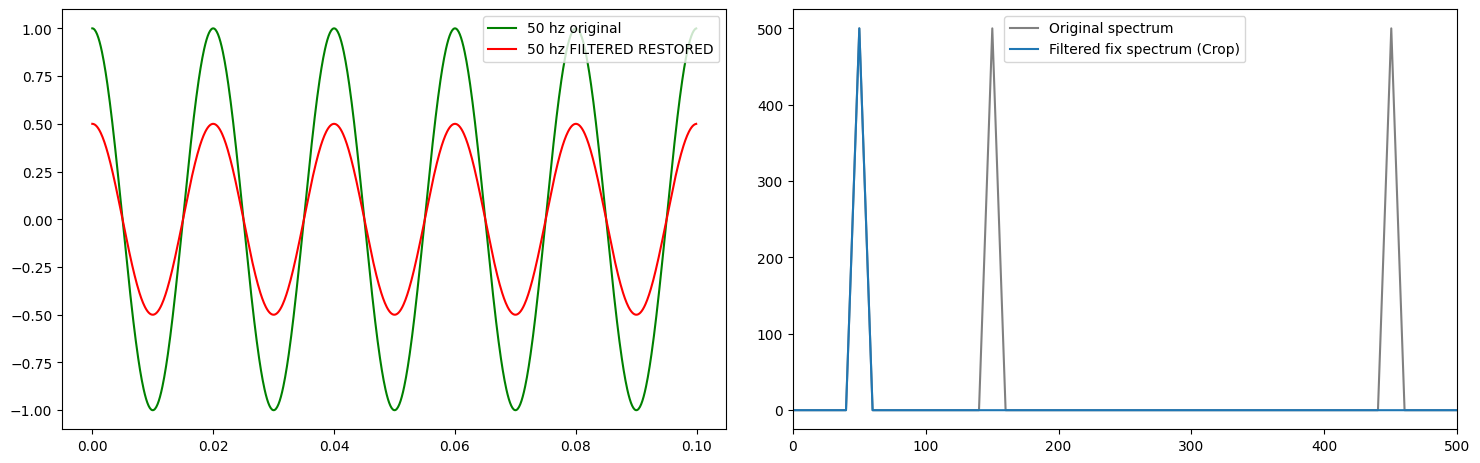

In [4]:
def butterwort_low(w, wc):
  return wc**2 / ((-w**2) + (1j) * np.sqrt(2)*wc*w + wc**2)

filter_L_freq = butterwort_low(xfs, 30)
filtered_L_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_L_freq

spectrum_d = spectrum_cos_signal[0:xfs.shape[0]].copy()
spectrum_d[15:] = 0
restored_filtred_L_signal = np.fft.ifft(filtered_L_spectrum)
spectrum_d_rest = np.fft.ifft(spectrum_d)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
# plt.plot(t_series_150hz, cos_signal, label='Original signal', color='grey')
plt.plot(t_series_150hz, cos_50hz_signal, label='50 hz original', color='green')
plt.plot(t_series_150hz, spectrum_d_rest, label='50 hz FILTERED RESTORED', color='red')
plt.legend()

plt.subplot(222)
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum", color='grey')
plt.plot(xfs, abs(spectrum_d), label='Filtered fix spectrum (Crop)')

plt.legend()
plt.xlim([0, 500])

plt.show()

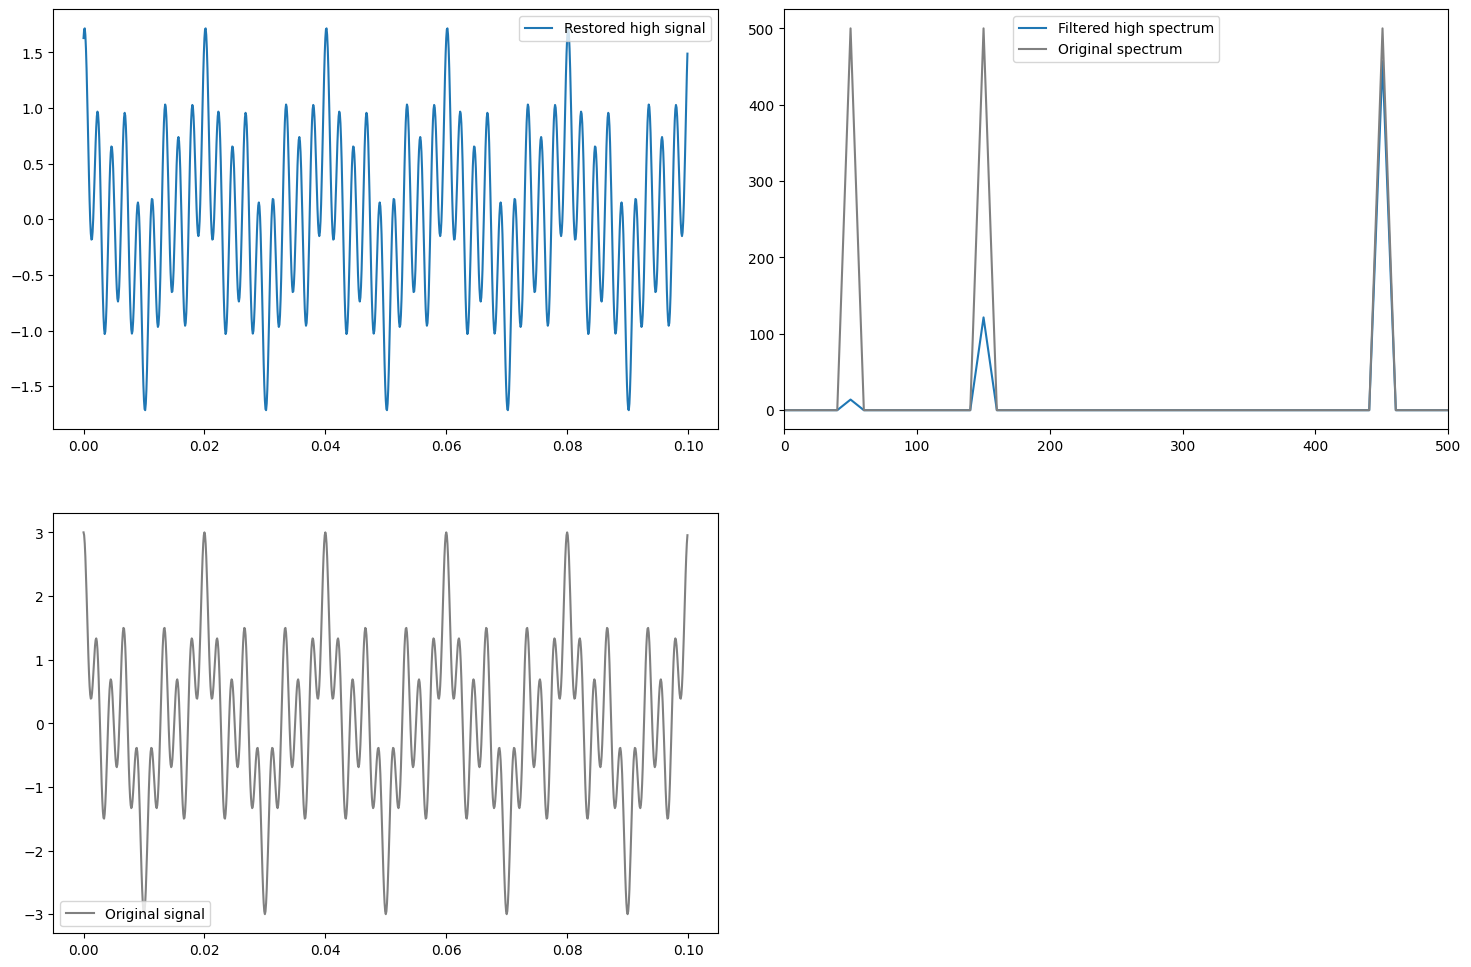

In [5]:
def butterwort_high(w, wc):
  return w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)

filter_H_freq = butterwort_high(xfs, 300)
filtered_H_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_H_freq

restored_filtred_H_signal = np.fft.ifft(filtered_H_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_H_signal, label='Restored high signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_H_spectrum), label="Filtered high spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum", color='grey')
plt.legend()
plt.xlim([0, 500])

plt.subplot(223)
plt.plot(t_series_150hz, cos_signal, label='Original signal', color='grey')
plt.legend()

plt.show()

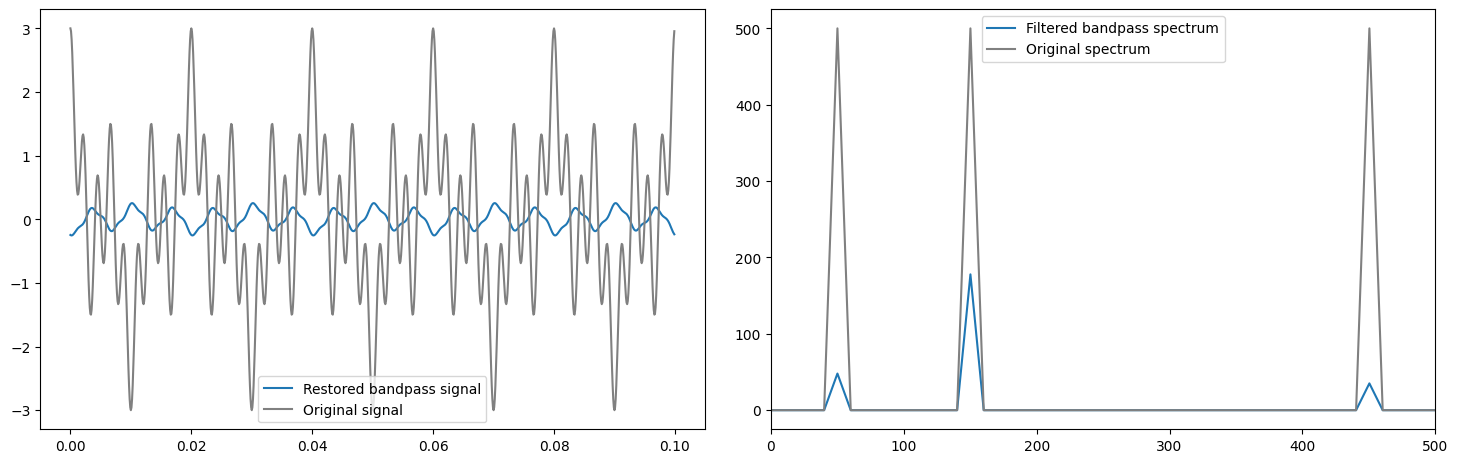

In [6]:
filter_band_freq = butterwort_high(xfs, 160) * butterwort_low(xfs, 120)
filtered_band_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_band_freq

restored_filtred_band_signal = np.fft.ifft(filtered_band_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_band_signal, label='Restored bandpass signal')
plt.plot(t_series_150hz, cos_signal, label='Original signal', color='grey')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_band_spectrum), label="Filtered bandpass spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum", color='grey')
plt.legend()
plt.xlim([0, 500])

plt.show()

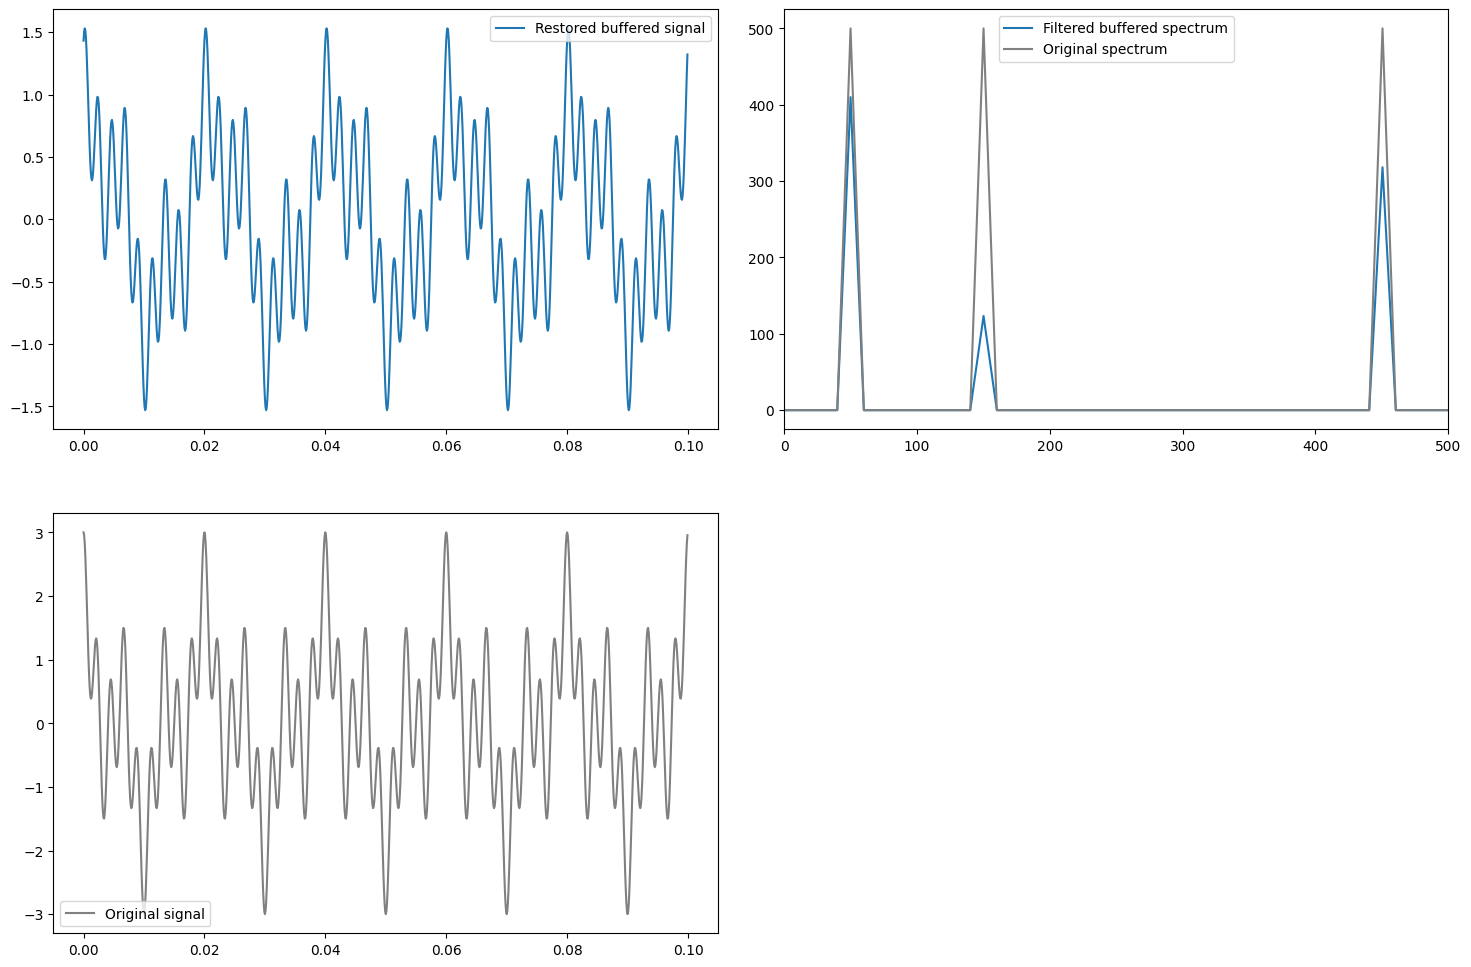

In [7]:
filter_Buff_freq = butterwort_high(xfs, 500) + butterwort_low(xfs, 60)
filtered_Buf_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_Buff_freq

restored_filtred_Buf_signal = np.fft.ifft(filtered_Buf_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_Buf_signal, label='Restored buffered signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_Buf_spectrum), label="Filtered buffered spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum", color='grey')
plt.legend()
plt.xlim([0, 500])

plt.subplot(223)
plt.plot(t_series_150hz, cos_signal, label='Original signal', color="grey")
plt.legend()

plt.show()

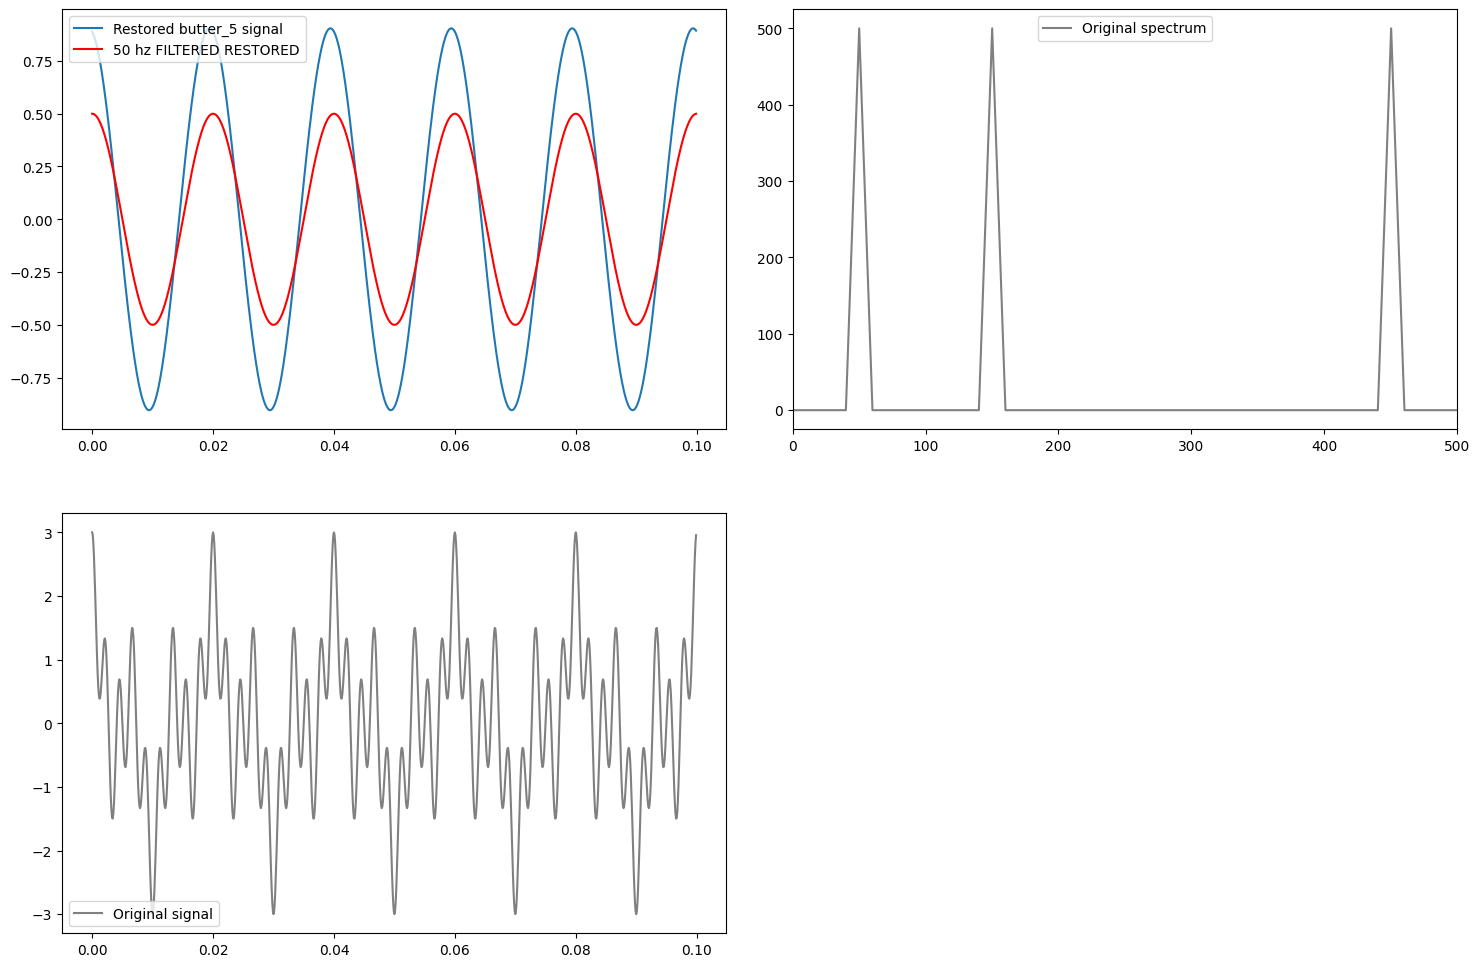

In [13]:
wc = 50

k4 = [1, 0, 0, 0, 0, 0, 0, 0, 1]  
res = np.roots(k4)

def buttern(w, wc, n, roots):
    p = 1
    for i in range (0,n):
        p = p * (1j*(w/wc) - roots[i])
    omega = 1 / p
    return omega

b3_filter = buttern(xfs, wc, 3, roots=res)
b4_filter = buttern(xfs, wc, 4, roots=res)
b5_filter = buttern(xfs, wc, 5, roots=res)
b2_filter = buttern(xfs, wc, 2, roots=res)
filtered_spectrum_butter_3 = b3_filter * spectrum_cos_signal
filtered_spectrum_butter_4 = b4_filter * spectrum_cos_signal
filtered_spectrum_butter_5 = b5_filter * spectrum_cos_signal
filtered_spectrum_butter_2 = b2_filter * spectrum_cos_signal

restored_filtred_Butter_3_signal = np.fft.ifft(filtered_spectrum_butter_3)
restored_filtred_Butter_4_signal = np.fft.ifft(filtered_spectrum_butter_4)
restored_filtred_Butter_5_signal = np.fft.ifft(filtered_spectrum_butter_5)
fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
#plt.plot(t_series_150hz, restored_filtred_Butter_3_signal, label='Restored butter_3 signal')
#plt.plot(t_series_150hz, restored_filtred_Butter_4_signal, label='Restored butter_4 signal')
plt.plot(t_series_150hz, restored_filtred_Butter_5_signal, label='Restored butter_5 signal')
plt.plot(t_series_150hz, spectrum_d_rest, label='50 hz FILTERED RESTORED', color='red')
#plt.plot(t_series_150hz, cos_50hz_signal, label='50hz signal')
plt.legend()

plt.subplot(222)

#plt.plot(xfs, abs(filtered_spectrum_butter_3), label="Filtered butter_3 spectrum")
#plt.plot(xfs, abs(filtered_spectrum_butter_4), label="Filtered butter_4 spectrum")
#plt.plot(xfs, abs(filtered_spectrum_butter_2), label="Filtered butter_2 spectrum")

plt.plot(xfs, spectrum_cos_signal, label="Original spectrum", color='grey')
plt.legend()
plt.xlim([0, 500])

plt.subplot(223)
plt.plot(t_series_150hz, cos_signal, label='Original signal', color="grey")
plt.legend()
plt.show()

plt.show()

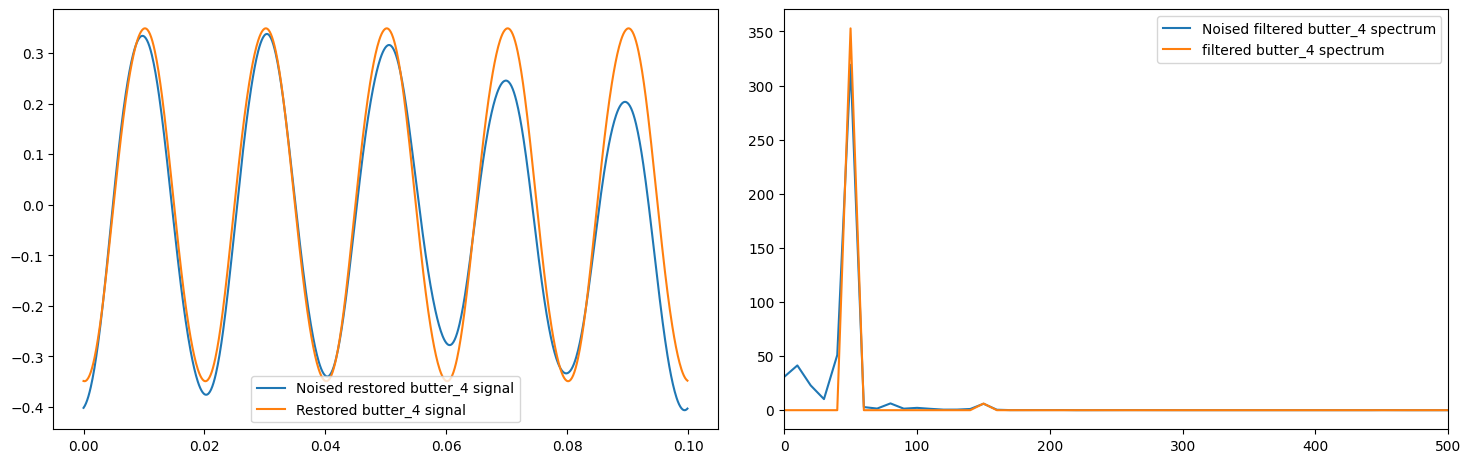

In [9]:

noised_cos_signal = cos_signal + np.random.normal(0, 1, cos_signal.shape)
noised_spectrum = np.fft.fft(noised_cos_signal)

noised_filtered_spectrum_butter_4 = b4_filter * noised_spectrum

restored_noised_filtred_Butter_4_signal = np.fft.ifft(noised_filtered_spectrum_butter_4)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_noised_filtred_Butter_4_signal, label='Noised restored butter_4 signal')
plt.plot(t_series_150hz, restored_filtred_Butter_4_signal, label='Restored butter_4 signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(noised_filtered_spectrum_butter_4), label="Noised filtered butter_4 spectrum")
plt.plot(xfs, abs(filtered_spectrum_butter_4), label="filtered butter_4 spectrum")
plt.legend()
plt.xlim([0, 500])

plt.show()